In [1]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
sys.path.append('../modules')
import abundance as cl_count
import covariance as covar
import mvp_pdf
import edit
import utils

In [12]:
n_param = 20
cov_param1 = np.zeros([n_param, n_param])
cov_param2 = np.zeros([n_param, n_param])
mean = np.linspace(1,2, n_param)

In [13]:
label_param = [r'$p_{' + str(i + 1) + '}$' for i in range(n_param)]

In [14]:
for i in range(n_param):
    for j in range(n_param):
        cov_param1[i,j] = (np.random.random(1)-.5)/5
        cov_param2[i,j] = (np.random.random(1)-.5)/4
        cov_param1[j,i]=cov_param1[i,j]
        cov_param2[j,i]=cov_param2[i,j]
for i in range(n_param): cov_param1[i,i] = abs(cov_param1[i,i]) + .1
for i in range(n_param): cov_param2[i,i] = abs(cov_param2[i,i]) + .2

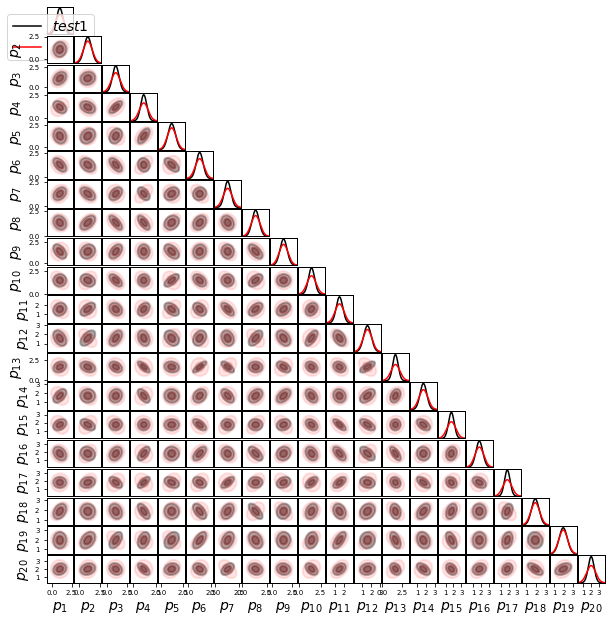

In [17]:
fig, ax = plt.subplots(n_param, n_param, figsize=(10,10),)
plt.rcParams['axes.linewidth']= 1.
settings1 = {'color':'k', 'label_size': 14, 'legend_size': 14, 'alpha':.3, 'label': r'$test1$', 'ticks_size':7}
settings2 = {'color':'r', 'label_size': 14, 'legend_size': 14, 'alpha':.1, 'label': r'$test2$', 'ticks_size':7}
figs = utils.corner_plot_Fisher(cov_param1, mean, label_param, ax, settings=settings1)
figs = utils.corner_plot_Fisher(cov_param2, mean, label_param, ax, settings=settings2, set_axis = True)
plt.savefig('corner_plot.pdf', bbox_inches='tight', dpi=300)